#Install Requirements

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


#Read Dataset

In [ ]:
data= pd.read_csv('IBM.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-07,136.003830,136.424469,135.009567,135.066925,116.428032,2538119
1,2019-10-08,134.072662,134.292542,132.170166,132.294449,114.038155,3373768
2,2019-10-09,133.623322,134.158707,132.686417,133.527725,115.101242,2741357
3,2019-10-10,133.623322,135.544937,133.422562,134.923523,116.304428,2713010
4,2019-10-11,136.491394,138.145309,136.338425,136.481842,117.647682,3134653


#Data Preprocessing
The close value of the stock is chosen as the data to train our model. Data is scaled using MinMaxScaler. The dataset consist of 755 datapoints which is divided to train and test datasets. First 600 is selected as train dataset and other 155 datapoinst as test dataset.

In [ ]:
data['Date']= pd.to_datetime(data.Date)

In [ ]:
feature = data.iloc[:, 4:5]

In [ ]:
scale= MinMaxScaler(feature_range=(0, 1))

In [ ]:
feature = scale.fit_transform(feature)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       756 non-null    datetime64[ns]
 1   Open       756 non-null    float64       
 2   High       756 non-null    float64       
 3   Low        756 non-null    float64       
 4   Close      756 non-null    float64       
 5   Adj Close  756 non-null    float64       
 6   Volume     756 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.5 KB


In [ ]:
train = feature[:600]
test = feature[600:]

The previous 30 days data will be used as an input for the model to predict the value of next day. That's why the training data is divided to the two parts using this script. Furthermore, for the model we need to have 3D data and because of that it is reshaped.

In [ ]:
train_x=[]
train_y=[]

for i in range(30, 600):
  train_x.append(train[i-30:i, 0])
  train_y.append(train[i, 0])

train_x = np.array(train_x)
train_y = np.array(train_y)

NameError: ignored

In [ ]:
train_x.shape

(570, 30)

In [ ]:
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))


#Model Development


In [ ]:
model = Sequential()

model.add(LSTM (units=100, return_sequences= True, input_shape = (train_x.shape[1], 1)))
model.add(Dropout(rate=0.2))

model.add(LSTM (units=100, return_sequences= True))
model.add(Dropout(rate=0.2))

model.add(LSTM (units=100, return_sequences= True))
model.add(Dropout(rate=0.2))

model.add(LSTM (units=100, return_sequences= True))
model.add(Dropout(rate=0.2))

model.add(LSTM (units=100))
model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 30, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 30, 100)           8

#Model Training 

In [ ]:
history= model.fit(train_x, train_y, epochs=100, batch_size=16)

Epoch 1/100
36/36 [==============================] - 25s 154ms/step - loss: 0.0571
Epoch 2/100
36/36 [==============================] - 4s 102ms/step - loss: 0.0215
Epoch 3/100
36/36 [==============================] - 4s 102ms/step - loss: 0.0201
Epoch 4/100
36/36 [==============================] - 4s 102ms/step - loss: 0.0181
Epoch 5/100
36/36 [==============================] - 4s 102ms/step - loss: 0.0161
Epoch 6/100
36/36 [==============================] - 4s 103ms/step - loss: 0.0144
Epoch 7/100
36/36 [==============================] - 4s 102ms/step - loss: 0.0118
Epoch 8/100
36/36 [==============================] - 4s 103ms/step - loss: 0.0119
Epoch 9/100
36/36 [==============================] - 4s 102ms/step - loss: 0.0093
Epoch 10/100
36/36 [==============================] - 4s 102ms/step - loss: 0.0091
Epoch 11/100
36/36 [==============================] - 4s 102ms/step - loss: 0.0100
Epoch 12/100
36/36 [==============================] - 4s 101ms/step - loss: 0.0082
Epoch 13/100

In [ ]:
loss = history.history['loss']

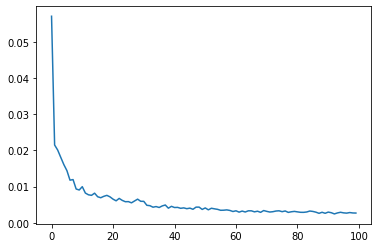

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss)

#Prediction
The test dataset is also preprocessed as training dataset for testing the performance of the model

In [ ]:
test_x=[]
test_y=[]

for i in range(30, 155):
  test_x.append(test[i-30:i, 0])
  test_y.append(test[i, 0])

test_x = np.array(test_x)
test_y = np.array(test_y)

In [ ]:
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))
predict_y = model.predict(test_x)

4/4 [==============================] - 2s 43ms/step


In [ ]:
predict_y =np.reshape(predict_y, (predict_y.shape[0], predict_y.shape[1]))
test_y =np.reshape(test_y, (test_y.shape[0], 1))

In [ ]:
test_y.shape

(125, 1)

The result is transformed to initial form of dataset for getting appropriate value.

In [ ]:
predict_y = scale.inverse_transform(predict_y)
test_y = scale.inverse_transform(test_y)

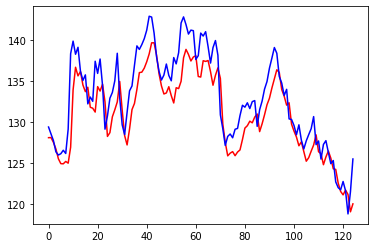

In [ ]:
plt.plot(predict_y, color='red')
plt.plot(test_y, color='blue')
plt.show()